### Goal: Build an interpretable churn classifier using a Decision Tree.
Why a Decision Tree? Simple to explain to stakeholders and easy to convert into business rules.
Result: ~95% accuracy on a synthetic churn-like dataset.

# Day 3 – Decision Trees for Binary Classification

This notebook simulates a real-world request from a team lead:

> “We need a simple, interpretable model to separate users who convert vs. users who do not convert, with a clear decision boundary and basic performance metrics.”

We will:
- Create a non-linear, synthetic classification dataset (2 classes)
- Train a Decision Tree classifier
- Evaluate performance (accuracy, confusion matrix, classification report)
- Visualize the decision boundary
- Inspect the tree structure for interpretability


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make plots appear inline in the notebook
%matplotlib inline


In [2]:
# Generate a non-linear 2D binary classification dataset (two moons)
X, y = make_moons(
    n_samples=500,
    noise=0.25,
    random_state=42,
)

X[:5], y[:10]


(array([[ 0.83094847, -0.29654552],
        [ 1.08838668,  0.8996934 ],
        [ 1.13563371, -0.46293467],
        [-0.08227739,  1.05971844],
        [ 0.44304745,  1.4189766 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1]))

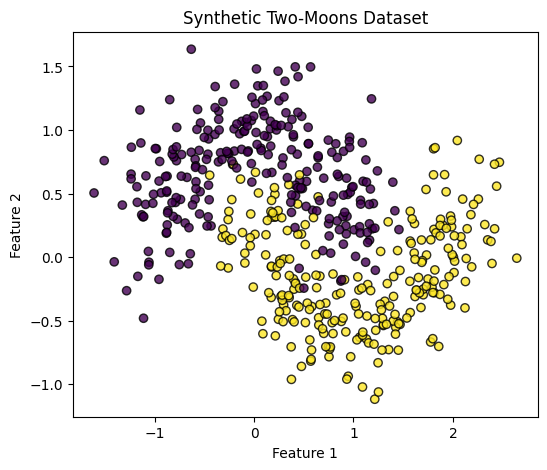

In [3]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", alpha=0.8)
plt.title("Synthetic Two-Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y,
)

X_train.shape, X_test.shape


((375, 2), (125, 2))

In [5]:
# Create and train the Decision Tree classifier
tree_clf = DecisionTreeClassifier(
    max_depth=None,
    random_state=42,
)

tree_clf.fit(X_train, y_train)

tree_clf


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:
# Predict on the test set
y_pred = tree_clf.predict(X_test)

# Compute basic metrics
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, cm, report


(0.952,
 array([[60,  3],
        [ 3, 59]]),
 '              precision    recall  f1-score   support\n\n           0       0.95      0.95      0.95        63\n           1       0.95      0.95      0.95        62\n\n    accuracy                           0.95       125\n   macro avg       0.95      0.95      0.95       125\nweighted avg       0.95      0.95      0.95       125\n')

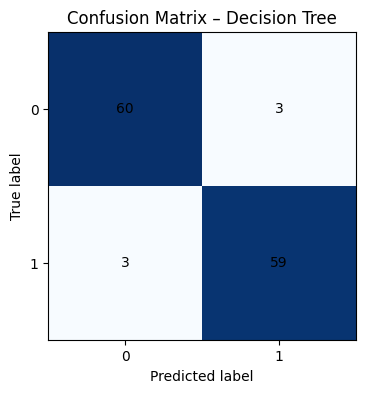

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))
im = ax.imshow(cm, cmap="Blues")

ax.set_title("Confusion Matrix – Decision Tree")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.show()


### Decision boundary – how the model separates churn vs non-churn

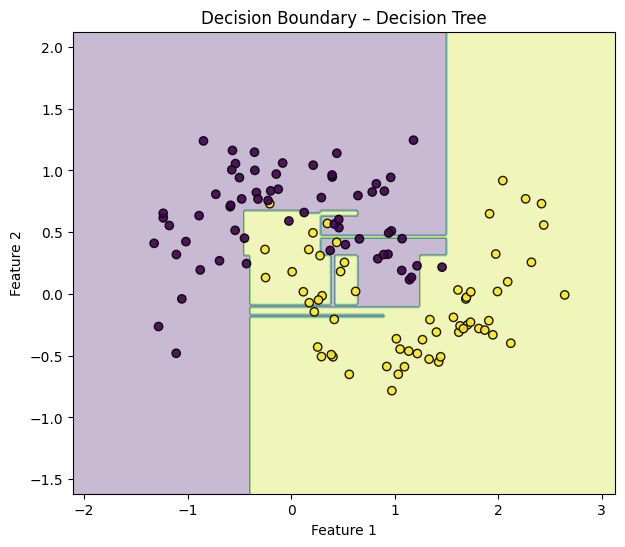

In [8]:
# Plot decision boundary for the Decision Tree
h = 0.02  # step size in the mesh

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h),
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = tree_clf.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k", alpha=0.9)
plt.title("Decision Boundary – Decision Tree")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### Decision tree structure – business rules view

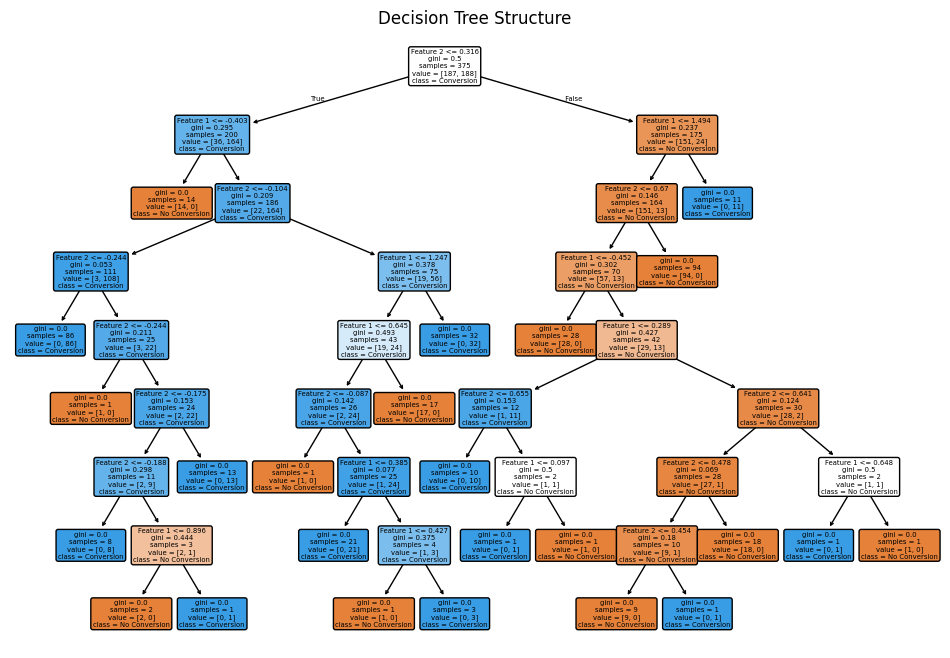

In [9]:
plt.figure(figsize=(12, 8))
plot_tree(
    tree_clf,
    filled=True,
    rounded=True,
    class_names=["No Conversion", "Conversion"],
    feature_names=["Feature 1", "Feature 2"],
)
plt.title("Decision Tree Structure")
plt.show()
